# prometheus_orca150 Dataset

For information on how to use sqlite3 see documentation: https://docs.python.org/3/library/sqlite3.html 
1) Fetching table and column names:

In [1]:
db_path = '/remote/ceph/user/o/oersoe/workshop/data/prometheus_orca150/orca150.db'

In [2]:
import sqlite3
import pandas as pd
import numpy as np

con = sqlite3.connect(db_path)

# Getting table and column names
query = 'select name from sqlite_master where type = "table"'
table_names = pd.read_sql(query,con)

for table_name in table_names['name']:
    print("Table name:", table_name)
    # Getting column names of table
    query = f"SELECT * FROM {table_name} LIMIT 1"
    column_names = pd.read_sql(query,con).columns
    print("Column names:", np.array(column_names))

Table name: mc_truth
Column names: ['injection_energy' 'injection_type' 'injection_interaction_type'
 'injection_zenith' 'injection_azimuth' 'injection_bjorkenx'
 'injection_bjorkeny' 'injection_position_x' 'injection_position_y'
 'injection_position_z' 'injection_column_depth' 'primary_lepton_1_type'
 'primary_hadron_1_type' 'primary_lepton_1_position_x'
 'primary_lepton_1_position_y' 'primary_lepton_1_position_z'
 'primary_hadron_1_position_x' 'primary_hadron_1_position_y'
 'primary_hadron_1_position_z' 'primary_lepton_1_direction_theta'
 'primary_lepton_1_direction_phi' 'primary_hadron_1_direction_theta'
 'primary_hadron_1_direction_phi' 'primary_lepton_1_energy'
 'primary_hadron_1_energy' 'total_energy' 'event_no']
Table name: total
Column names: ['sensor_id' 'sensor_pos_x' 'sensor_pos_y' 'sensor_pos_z'
 'sensor_string_id' 't' 'event_no']


2) Plotting distribution event energy <br>
- truth value 'injection_energy': energy of the neutrino. <br>
- truth value 'total_energy': energy of the light that was recorded in the detector.

0
1


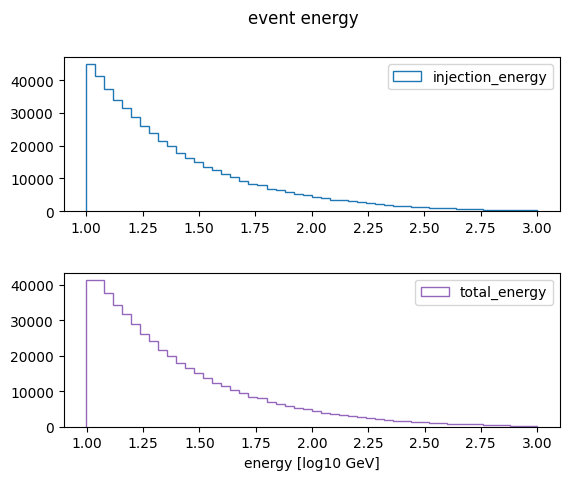

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

bins = 50
colors = ['tab:blue', 'tab:purple']
fig, ax = plt.subplots(2)
for count, i in enumerate(['injection_energy','total_energy']):
    sql = f"SELECT {i} FROM mc_truth"
    column_data = pd.read_sql(sql, con)
    print(count)
    ax[count].hist(np.log10(column_data), histtype = 'step', label= i, bins=bins, color=colors[count])
    ax[count].legend()

# Show plot

plt.subplots_adjust(hspace=0.4)
plt.legend()
plt.xlabel('energy [log10 GeV]')

fig.suptitle('event energy')
plt.show()


3) Plotting distribution of xyz-coordinates of sensors 

0
1
2


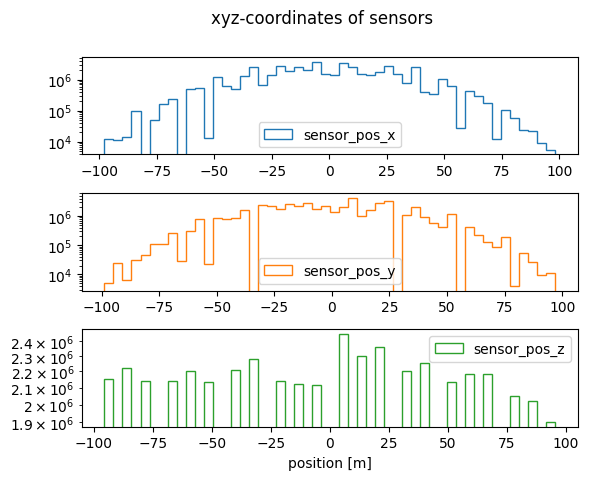

In [3]:
# WARNING: This cell can take up to 10 minutes to run!

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

bins = 50
fig, ax = plt.subplots(3)
colors = ['tab:blue', 'tab:orange', 'tab:green']
query = 'SELECT event_no FROM mc_truth'
event_nos = pd.read_sql(query,con).sample(frac= 0.1).reset_index(drop = True)
for count, i in enumerate(['sensor_pos_x', 'sensor_pos_y', 'sensor_pos_z']):
    query = f'SELECT {i} FROM total WHERE event_no in {str(tuple(event_nos["event_no"]))}'
    column_data = pd.read_sql(query,con)
    print(count)
    ax[count].hist(column_data, histtype = 'step', label= i, bins=bins, color=colors[count])
    ax[count].legend()
    ax[count].set_yscale('log')


# Show plot
fig.suptitle("xyz-coordinates of sensors")
plt.subplots_adjust(hspace=0.4)
plt.xlabel('position [m]')


plt.show()
 

4) Plotting zenith azimuth distribution

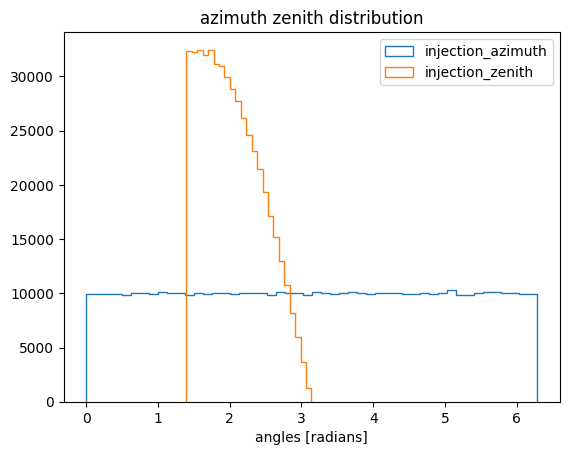

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

bins = [50,23]

for count, i in enumerate(['injection_azimuth', 'injection_zenith']):
    sql = f"SELECT {i} FROM mc_truth"
    column_data = pd.read_sql(sql, con)
    plt.hist(column_data, histtype = 'step', label= i, bins=bins[count])

# Show plot
plt.title("azimuth zenith distribution")
plt.legend()
plt.xlabel('angles [radians]')
plt.show()
